<a href="https://colab.research.google.com/github/soyab266/data-science/blob/master/clustering_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [16]:
df=pd.read_csv('/content/student_clustering.csv')
df1=pd.read_csv('/content/Concrete.csv')

In [7]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [17]:
df1.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


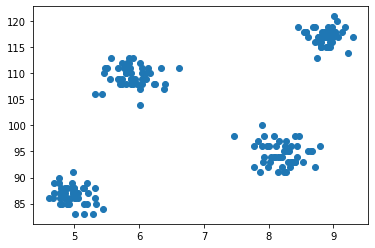

In [11]:
plt.scatter(df['cgpa'], df['iq'],cmap='winter')

In [22]:
print(df.shape)
print(df1.shape)

(200, 2)
(1030, 9)


In [23]:
from sklearn.cluster import KMeans

In [25]:
wcss=[]
for i in range(1,20):
  km=KMeans(n_clusters=i)
  km.fit_predict(df)
  wcss.append(km.inertia_)


In [26]:
wcss

[29957.898288000004,
 4184.141270000001,
 2364.005583420084,
 681.9696600000003,
 514.1616803171116,
 388.85240268759804,
 302.653499358208,
 235.30768874397904,
 199.1703850136915,
 175.41101418018172,
 156.30767662264068,
 134.11214077565322,
 111.40502762488327,
 99.05078981317072,
 83.90037283234858,
 74.59018466478696,
 62.85026185426416,
 58.41109613095238,
 53.996134893725554]

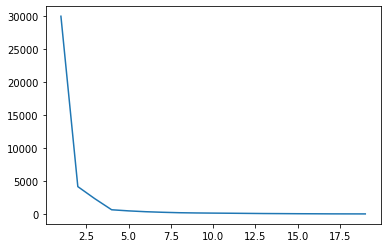

In [29]:
plt.plot(range(1,20),wcss)

In [55]:
wcss1=[]
for i in range(1,20):
  km=KMeans( n_clusters=i )
  km.fit_predict(df1)
  wcss1.append(km.inertia_)

In [57]:
x=df.iloc[:,:].values
km=KMeans(n_clusters=4 )
y_means=km.fit_predict(x)


In [43]:
y_means

array([0, 1, 2, 2, 1, 1, 2, 3, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0,
       2, 0, 0, 2, 0, 3, 2, 1, 3, 1, 3, 1, 2, 2, 3, 1, 0, 1, 0, 2, 2, 0,
       3, 3, 2, 1, 3, 1, 0, 0, 3, 2, 3, 1, 1, 3, 1, 3, 1, 2, 2, 3, 0, 3,
       2, 0, 1, 2, 1, 3, 2, 0, 1, 3, 1, 3, 0, 2, 2, 3, 1, 0, 3, 0, 3, 1,
       3, 1, 3, 3, 2, 0, 2, 2, 3, 2, 0, 3, 1, 0, 0, 3, 0, 0, 2, 0, 3, 3,
       2, 3, 1, 1, 2, 3, 2, 1, 3, 0, 0, 1, 2, 3, 2, 0, 2, 1, 0, 2, 2, 1,
       0, 0, 1, 3, 1, 0, 2, 2, 2, 0, 1, 0, 0, 3, 0, 3, 1, 0, 3, 0, 3, 3,
       0, 2, 1, 3, 1, 2, 0, 3, 1, 2, 3, 0, 1, 0, 0, 3, 3, 1, 3, 0, 0, 2,
       3, 1, 0, 3, 3, 1, 1, 1, 2, 0, 2, 2, 3, 1, 2, 2, 0, 0, 2, 0, 3, 1,
       1, 3], dtype=int32)

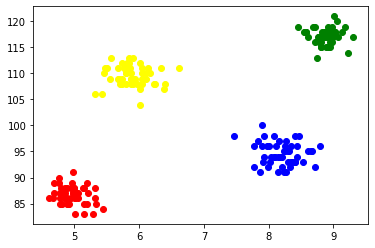

In [45]:
plt.scatter(x[y_means==0,0], x[y_means==0,1], color='red')
plt.scatter(x[y_means==1,0], x[y_means==1,1], color='yellow')
plt.scatter(x[y_means==2,0], x[y_means==2,1], color='blue')
plt.scatter(x[y_means==3,0], x[y_means==3,1], color='green')

In [60]:
from sklearn.datasets import make_blobs
centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]
X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [62]:
fig=px.scatter_3d(x=X[:,0], y=X[:,1],z=X[:,2])

fig.show()

In [63]:
wcss=[]
for i in range(1,15):
  km=KMeans(n_clusters=i)
  km.fit_predict(X)
  y_means=wcss.append(km.inertia_)



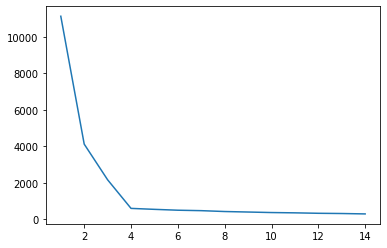

In [64]:
plt.plot(range(1,15),wcss)

In [65]:
km=KMeans(n_clusters=4 )
y_pred=km.fit_predict(X)

In [67]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()